In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.special import factorial

In [2]:
i=50
j=1
#Read="C:/Users/antoi/Desktop/Vitesse_shunt/"+str(i)+"_"+str(j)+".csv"
Read="125_alt_Amplitude100mV_offset1V_ethanol_1.csv"
data=pd.read_csv(Read,skiprows=44).values
data

array([[nan, 'Timestamp', 'Source Value', 'Reading'],
       [nan, '(seconds)', '(Amps)', '(Volts)'],
       [1.0, '0.0', '0.0', '1.068477'],
       ...,
       [998.0, '13.958', '0.0', '1.019744'],
       [999.0, '13.972', '0.0', '0.9169014'],
       [1000.0, '13.986', '0.0', '1.082345']], dtype=object)

In [12]:
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts1 = Volts.astype(np.float)
Time1= Time.astype(np.float)
Amps1= Amps.astype(np.float)

In [13]:
#print('Volts ='+'[' +", ".join([str(x) for x in Volts])+']')

In [14]:
VoltsNorm=(Volts>0.6)*1

TypeError: '>' not supported between instances of 'str' and 'float'

# Statistique 

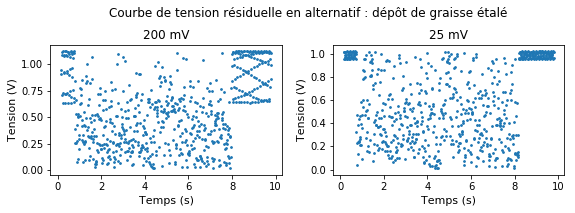

In [4]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)

Read="125_alt_Amplitude200mV_offset1V_graisse_etal_1.csv"
data=pd.read_csv(Read,skiprows=44).values
data
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts1 = Volts.astype(np.float)
Time1= Time.astype(np.float)
Amps1= Amps.astype(np.float)
Volts=Volts1[10:700]
Time=Time1[10:700]
plt.title("200 mV")
plt.xlabel('Temps (s)',fontsize=11)
plt.ylabel('Tension (V)',fontsize=11)
plt.scatter(Time,Volts,s=3)

plt.subplot(1,2,2)

Read2="125_alt_Amplitude25mV_offset1V_graisse_etal_1.csv"
data2=pd.read_csv(Read2,skiprows=44).values
data
Volts2=data2[3:,3]
Time2=data2[3:,1]
Amps2=data2[3:,2]
Volts3 = Volts2.astype(np.float)
Time3= Time2.astype(np.float)
Amps3= Amps2.astype(np.float)
Volts2=Volts3[10:700]
Time2=Time3[10:700]
plt.title("25 mV")
plt.xlabel('Temps (s)',fontsize=11)
plt.ylabel('Tension (V)',fontsize=11)
plt.scatter(Time2,Volts2,s=3)


plt.suptitle("Courbe de tension résiduelle en alternatif : dépôt de graisse étalé",y=1.0,x=0.53)
#plt.subplots_adjust(wspace = 0.5)
#plt.subplots_adjust(hspace = 01.2)
len(Volts)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('alt_graisse_etal.eps')

In [8]:
#Volts=Volts[50:900]
#Time=Time[50:900]

## Trouver les points où le déshuntage commence

In [9]:
for i in np.arange(0,len(Volts),1):
    if Volts[i] < 0.2:
        First=i
        break;
        
for i in np.flip(np.arange(0,len(Volts),1)):
    if Volts[i] < 0.2:
        Last=i
        break;

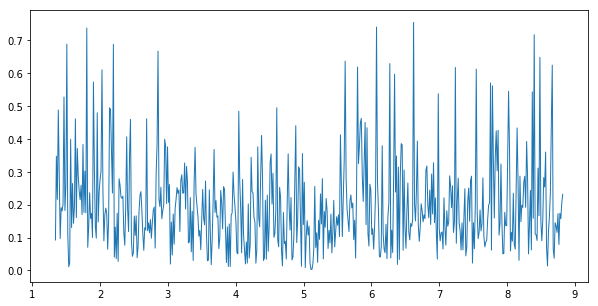

In [10]:
Volts=Volts[First:Last]
Time=Time[First:Last]
plt.figure(figsize=(10,5))
plt.plot(Time,Volts,linewidth=1)

In [12]:
Last

630

# Plot de la distribution

In [53]:
Max=np.max(Volts)
Min=0
Pas=0.005
Balayage=np.arange(Min,Max+Pas,Pas)
Balayage

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [54]:
Nombre=np.zeros(len(Balayage)-1)
VoltsHist=np.zeros(len(Balayage)-1)
for i in np.arange(0,len(Balayage)-1,1):
    A=(Volts>Balayage[i])*1
    B=(Volts<Balayage[i+1])*1
    Nombre[i]=np.sum(A*B)
    VoltsHist[i]=(Balayage[i]+Balayage[i+1])/2

Text(0, 0.5, "Nombre de Points dans l'intervalle")

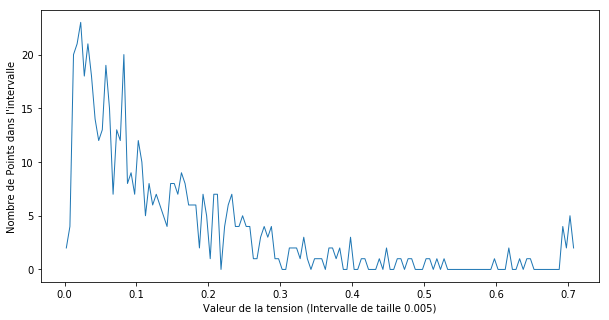

In [55]:
plt.figure(figsize=(10,5))
plt.plot(VoltsHist,Nombre,linewidth=1)
plt.xlabel('Valeur de la tension (Intervalle de taille '+str(Pas)+')')
plt.ylabel("Nombre de Points dans l'intervalle")

# Loi de Poisson

In [56]:
def Poisson(x,a,b,c,d):
    return (1/a)*np.exp(-b*x**2)+c

popt1, pcov1 = curve_fit(Poisson, VoltsHist, Nombre)

Text(0, 0.5, "Nombre de Points dans l'intervalle")

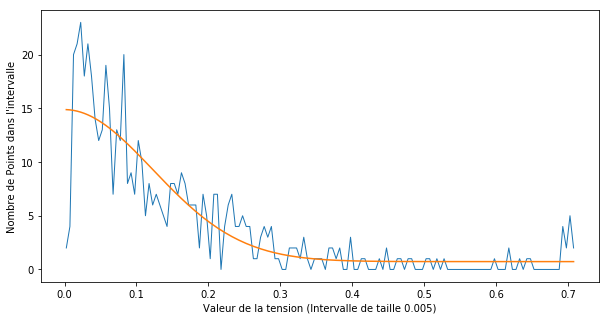

In [57]:

plt.figure(figsize=(10,5))
plt.plot(VoltsHist,Nombre,linewidth=1)
plt.plot(VoltsHist, Poisson(VoltsHist, *popt1),label="Regression")
plt.xlabel('Valeur de la tension (Intervalle de taille '+str(Pas)+')')
plt.ylabel("Nombre de Points dans l'intervalle")

# Plot de l'histogramme

(array([ 2.,  1.,  6.,  5.,  7.,  2., 10.,  8.,  6.,  1., 10.,  4., 13.,
        11.,  7.,  6.,  5.,  9.,  9.,  5.,  7.,  9., 10., 12., 10.,  6.,
        11., 12., 10., 16., 10.,  9.,  9., 10., 10.,  7., 12.,  7., 10.,
         7.,  7.,  9.,  6.,  6.,  6.,  4.,  7., 10.,  7.,  6.,  7.,  6.,
         5.,  6.,  5.,  5.,  7.,  7.,  4.,  2.,  4.,  3.,  2.,  3.,  2.,
         5.,  0.,  2.,  1.,  4.,  2.,  2.,  1.,  2.,  2.,  5.,  2.,  2.,
         2.,  2.,  0.,  1.,  2.,  0.,  1.,  1.,  2.,  0.,  2.,  1.,  1.,
         1.,  3.,  0.,  0.,  1.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
     

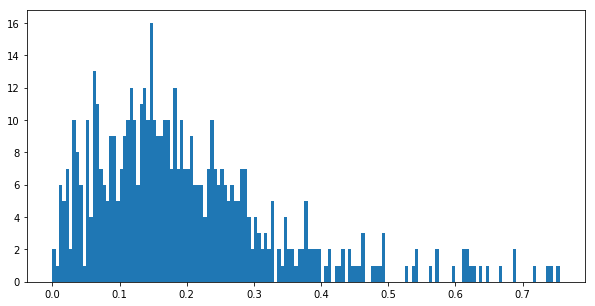

In [101]:

Max=np.max(Volts)
Min=0
Pas=0.005
np.sum(A*B)
Balayage=np.arange(Min,Max+Pas,Pas)
Balayage

plt.figure(figsize=(10,5))
plt.hist(Volts,bins=Balayage)

# Binaire


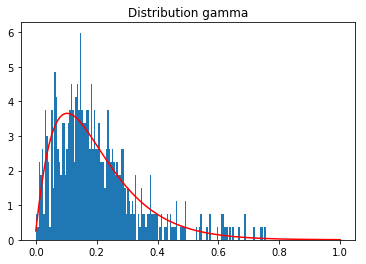

In [102]:
from scipy.stats import gamma
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = gamma.rvs(2,size=1000) 
samp1=Volts
param = gamma.fit(samp1) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,1000)
# fitted distribution
pdf_fitted = gamma.pdf(x,param[0],param[1],param[2])


title('Distribution gamma')
plot(x,pdf_fitted,'r-')
hist(Volts,bins=Balayage,density=True) #density=True #permet de normaliser
show()

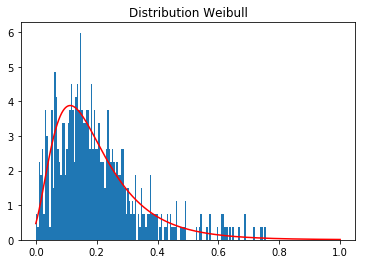

In [113]:
from scipy.stats import  lognorm
from scipy import stats
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = gamma.rvs(2,size=1000) 
samp1=Volts
param =  lognorm.fit(samp1) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,1000)
# fitted distribution
pdf_fitted =  lognorm.pdf(x,param[0],param[1],param[2])


title('Distribution Weibull')
plot(x,pdf_fitted,'r-')
hist(Volts,bins=Balayage,density=True) #density=True #permet de normaliser
show()

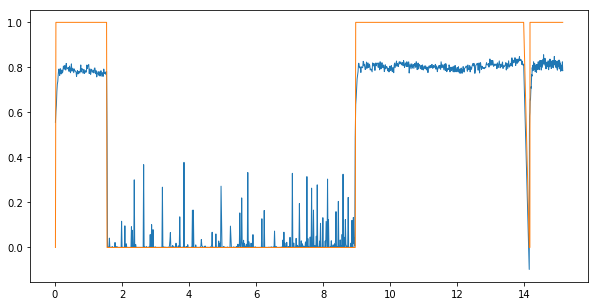

In [107]:
plt.figure(figsize=(10,5))
plt.plot(Time,Volts,linewidth=1)
plt.plot(Time,VoltsNorm,linewidth=1)

7.853975000000001
7.853975000000001
11.7809625
11.7809625
15.707950000000002
15.707950000000002
19.6349375
19.6349375


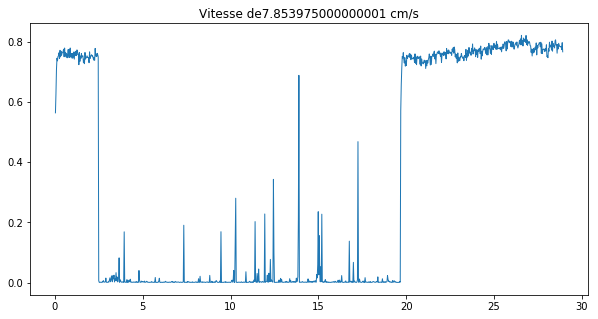

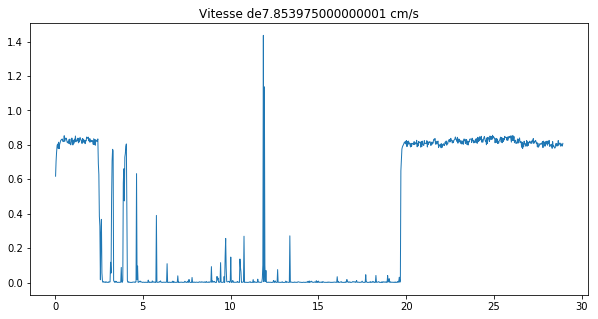

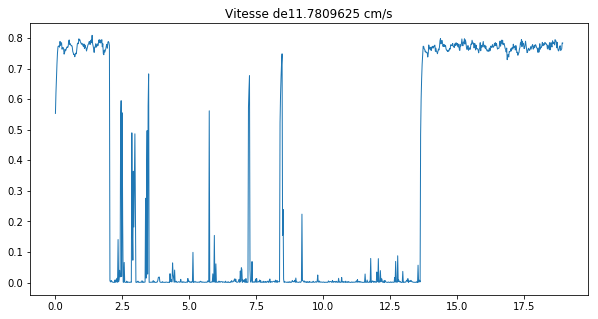

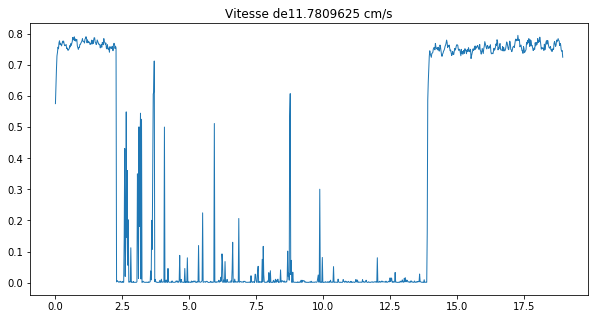

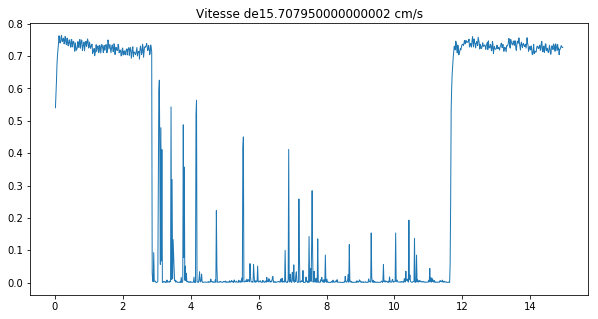

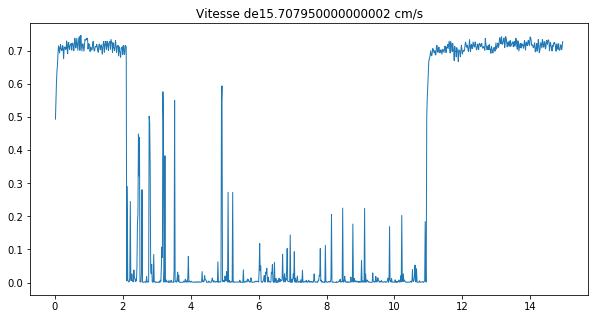

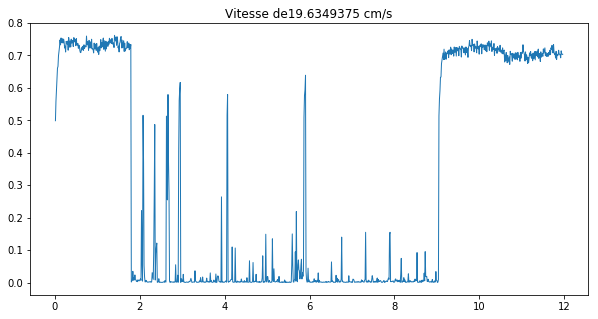

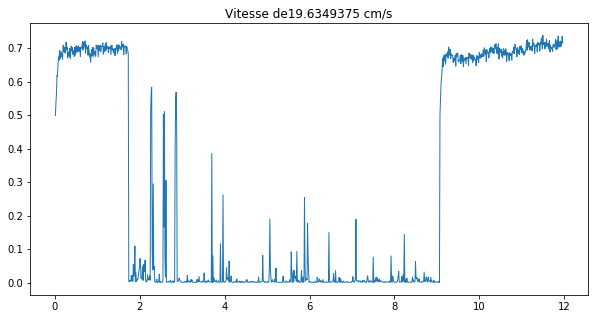

In [6]:
for i in [50,75,100,125]:
    for j in [1,2]:
        Read="C:/Users/antoi/Desktop/Vitesse_shunt/"+str(i)+"_"+str(j)+".csv"
        data=pd.read_csv(Read,skiprows=44).values
        Volts=data[3:1000,3]
        Time=data[3:1000,1]
        Volts = Volts.astype(np.float)
        Time= Time.astype(np.float)
        plt.figure(figsize=(10,5))
        v=(i*9.42477)/60
        print(v)
        label="Vitesse de"+str(v)+" cm/s"
        plt.plot(Time,Volts,linewidth=1)
        plt.title(label)